In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df["Marital Status"].dtype

dtype('O')

In [5]:
df["Marital Status"].nbytes

260488

In [6]:
df["Marital Status"] = df["Marital Status"].astype("category")
df["Marital Status"].dtype

CategoricalDtype(categories=[' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Separated',
                  ' Widowed'],
, ordered=False)

In [7]:
df['Marital Status'].nbytes

32617

In [8]:
df["New_column"] = pd.Categorical(df["Marital Status"] , categories= ['Separated', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Divorced',
                  ' Widowed'], 
                  ordered=True)

# change dataframe dtypes while reading file


* df_datatypes = {"column_1" : "int", 
            * "column_2" : "int",
            * "column_3" : "int",
            * "column_4" : "category",
            * "column_5" : "bool",
            * "column_6" : "float",}

* df.read_csv("file_name", dtypes = df_datatypes)

# Set and remove categories

### cat.set_categories(
    * change column data to categories but any value not in the list we pass to this function will dropped
)

### cat.add_categories(
    * Doesn't change column data at all but it adds new categories to column which has category dtype
)

### cat.remove_categories(
    * Matching categories wll change to be NANS
)

In [9]:
df["cat_test"] = pd.Categorical(df["Marital Status"] , categories= ['Separated', ' Married-AF-spouse', ' Married-civ-spouse',
                  ' Married-spouse-absent', ' Never-married', ' Divorced',
                  ' Widowed'], 
                  ordered=True)


In [10]:
df.cat_test.value_counts(dropna=False)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
NaN                        1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Separated                     0
Name: cat_test, dtype: int64

In [11]:
df.cat_test = df.cat_test.cat.add_categories(new_categories=["not_married", "not_deforced"])
df.cat_test.value_counts(dropna=False)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
NaN                        1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Separated                     0
not_married                   0
not_deforced                  0
Name: cat_test, dtype: int64

In [12]:
df.cat_test = df.cat_test.cat.remove_categories(["not_married", "not_deforced"])
df.cat_test.value_counts(dropna=False)

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
NaN                        1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Separated                     0
Name: cat_test, dtype: int64

In [13]:
df.cat_test = df.cat_test.cat.set_categories(['Separated', ' Married-AF-spouse', ' Married-civ-spouse'])
df.cat_test.value_counts(dropna=False)

NaN                    17562
 Married-civ-spouse    14976
 Married-AF-spouse        23
Separated                  0
Name: cat_test, dtype: int64

### check categoires for column

In [14]:
df.cat_test.cat.categories

Index(['Separated', ' Married-AF-spouse', ' Married-civ-spouse'], dtype='object')

### Rename categoires 

In [15]:
df.cat_test = df.cat_test.cat.rename_categories({"Separated":"S", " Married-civ-spouse":"M"})
df.cat_test.cat.categories

Index(['S', ' Married-AF-spouse', 'M'], dtype='object')

In [16]:
df.cat_test = df.cat_test.cat.rename_categories(lambda x: x.lower())
df.cat_test.cat.categories

Index(['s', ' married-af-spouse', 'm'], dtype='object')

## Collaps categories

* replace values using str.replace 
* confirm column type still category

## reorder categories (for disply in groupby and visualization in this order)

In [17]:
df.cat_test = df.cat_test.cat.reorder_categories(new_categories=[' married-af-spouse',"m", 's'], ordered=False)
df.groupby("cat_test")["cat_test"].value_counts(dropna=False)

cat_test                              
 married-af-spouse   married-af-spouse       23
                    m                         0
                    s                         0
m                   m                     14976
                     married-af-spouse        0
                    s                         0
s                    married-af-spouse        0
                    m                         0
                    s                         0
Name: cat_test, dtype: int64

## Filter by category 

In [18]:
df.loc[df.cat_test == "m" , :]

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k,New_column,cat_test
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Married-civ-spouse,m
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Married-civ-spouse,m
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Married-civ-spouse,m
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Married-civ-spouse,m
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Married-civ-spouse,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K,Married-civ-spouse,m
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,Married-civ-spouse,m
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,Married-civ-spouse,m
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,Married-civ-spouse,m


In [19]:
df2 = pd.read_csv("adult.csv")
df2.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


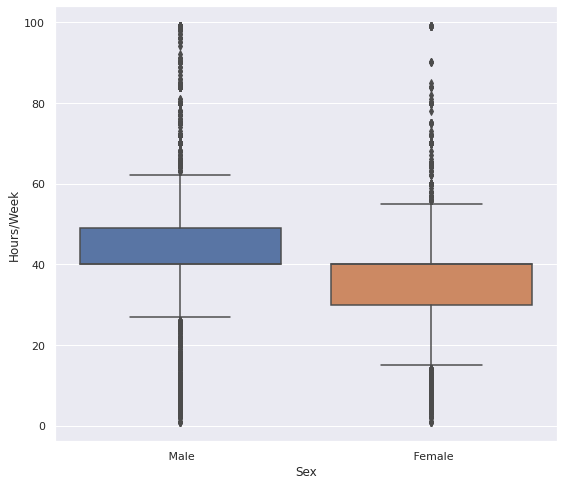

In [20]:
sns.set(rc={"figure.figsize":(9, 8)}) 

ax = sns.boxplot(x = "Sex", y ="Hours/Week", data=df2 )

# to change font size on scales
sns.set(font_scale = 2)



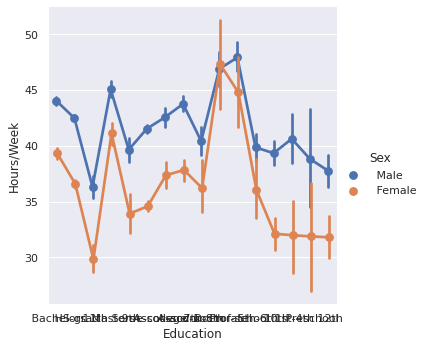

In [21]:
sns.set(rc={"figure.figsize":(9, 8)}) 

# dodge to make lines not exactly on same place to be more clear

sns.catplot(x = "Education", y ="Hours/Week", data=df2, kind="point",hue="Sex", dodge=True )

# to change font size on scales
sns.set(font_scale = 2)


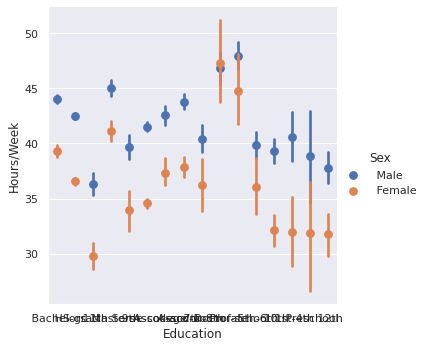

In [22]:
sns.set(rc={"figure.figsize":(9, 8)}) 

# join to remove line between dots

sns.catplot(x = "Education", y ="Hours/Week", data=df2, kind="point",hue="Sex", join=False )

# to change font size on scales
sns.set(font_scale = 2)


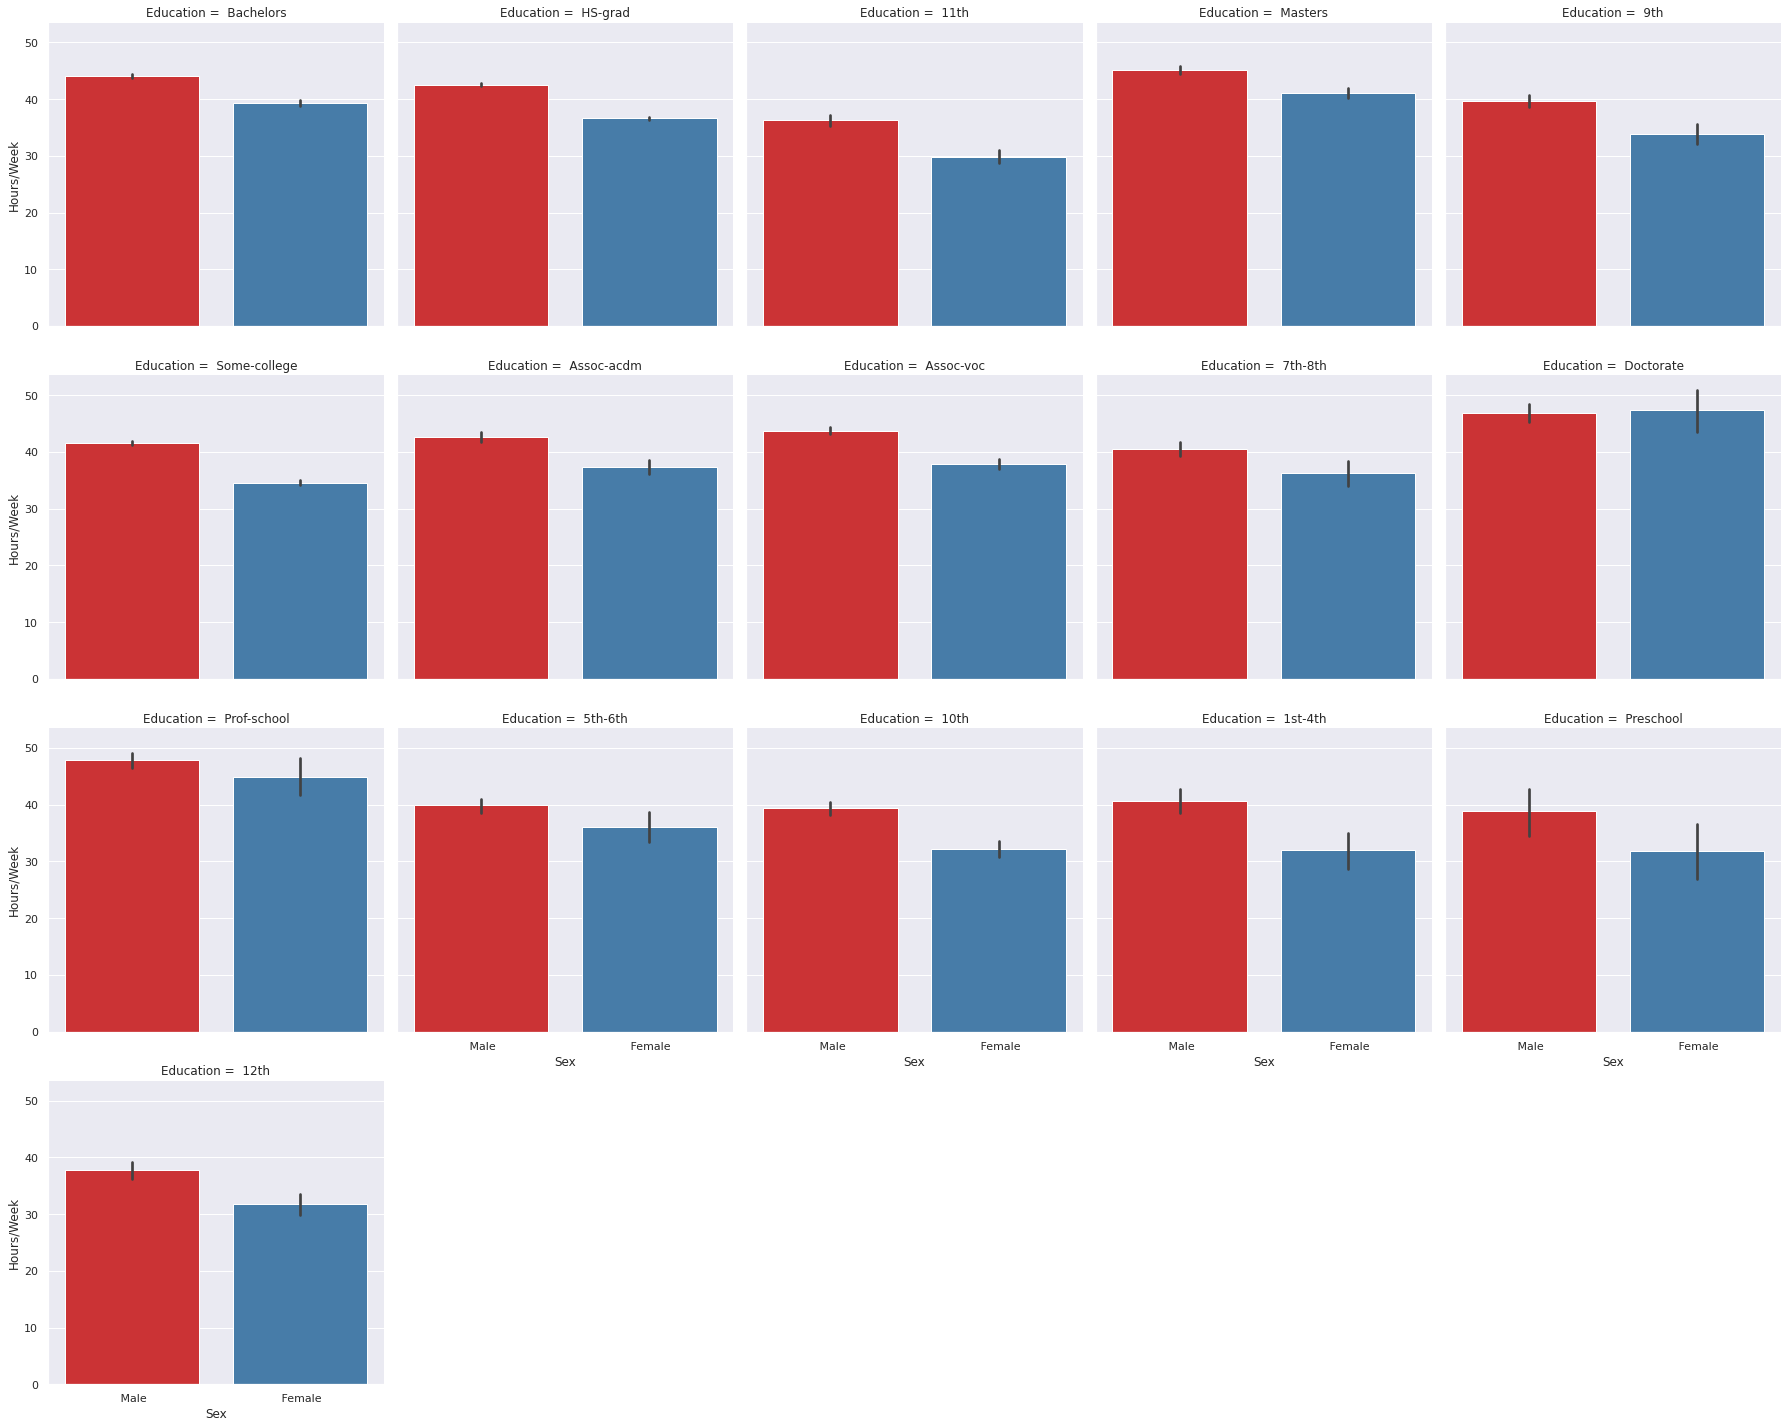

In [29]:
sns.set(rc={"figure.figsize":(9, 8)}) 

# col_wrap to make five plots in each line

# palette to change colors

sns.catplot(x = "Sex", y ="Hours/Week", data=df2, kind="bar",col="Education", col_wrap=5,   palette=sns.color_palette("Set1"))

# to change font size on scales
sns.set(font_scale = 2)



## Seaaborn pallets 

* "Set1"
* "Set2"
* "Tab10"
* "Paired"


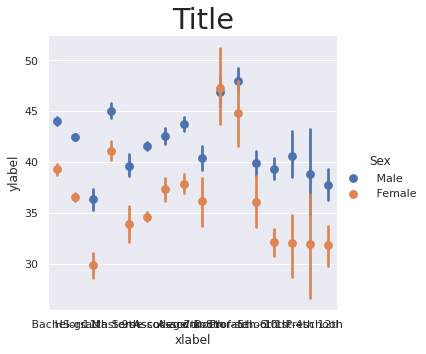

In [25]:
sns.set(rc={"figure.figsize":(9, 8)}) 


ax = sns.catplot(x = "Education", y ="Hours/Week", data=df2, kind="point",hue="Sex", join=False )

# to change font size on scales
sns.set(font_scale = 2)
ax.fig.suptitle("Title",)
ax.set_axis_labels("xlabel", "ylabel")

# to make title over the chart 

plt.subplots_adjust(top=.9)

# Label encoding or change categorical to numbers 

In [38]:
df["test"] =df.cat_test.cat.codes
df.test.value_counts(dropna=False)

-1    17562
 1    14976
 0       23
Name: test, dtype: int64

In [39]:
df.cat_test.value_counts(dropna=False)

NaN                   17562
m                     14976
 married-af-spouse       23
s                         0
Name: cat_test, dtype: int64

# Make dictionary from 2 lists

In [41]:
x = [0,1,2,3,4,5,6]
y = ["a", "b", "c","d","e","f","g" ]

d = dict(zip(x, y))
d

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g'}

# .map same as .replace

# Dummy variables

In [45]:
df_new2 = pd.get_dummies(df, columns = ["Education"])

In [46]:
df_new2.head()

,Age,Workclass,fnlgwt,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,...,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,1,0,0,0,0,0,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,1,0,0,0,0,0,0


# we can not make dummies from all columns to avoid over fitting on machine learning